<a href="https://colab.research.google.com/github/ashsenth/MSDS-422/blob/main/Assigment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#Package imports
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
from sklearn import tree
from sklearn.tree import _tree
from google.colab import files
uploaded = files.upload()
import io

sns.set()
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

TARGET_F = "TARGET_BAD_FLAG"
TARGET_A = "TARGET_LOSS_AMT"


Saving hw1_HMEQ_loss.csv to hw1_HMEQ_loss.csv


In [3]:
#Import csv and data
df = pd.read_csv(io.BytesIO(uploaded['hw1_HMEQ_loss.csv']))
print("Data\n")
print(df.head(3).T)

Data

                                 0             1             2
TARGET_BAD_FLAG           1.000000      1.000000      1.000000
TARGET_LOSS_AMT         641.000000   1109.000000    767.000000
LOAN                   1100.000000   1300.000000   1500.000000
z_IMP_REASON_DebtCon      0.000000      0.000000      0.000000
z_IMP_REASON_HomeImp      1.000000      1.000000      1.000000
z_IMP_REASON_MISSING      0.000000      0.000000      0.000000
z_IMP_JOB_MISSING         0.000000      0.000000      0.000000
z_IMP_JOB_Mgr             0.000000      0.000000      0.000000
z_IMP_JOB_Office          0.000000      0.000000      0.000000
z_IMP_JOB_Other           1.000000      1.000000      1.000000
z_IMP_JOB_ProfExe         0.000000      0.000000      0.000000
z_IMP_JOB_Sales           0.000000      0.000000      0.000000
z_IMP_JOB_Self            0.000000      0.000000      0.000000
M_MORTDUE                 0.000000      0.000000      0.000000
IMP_MORTDUE           25860.000000  70053.000000 

In [4]:
#Split Data
X = df.copy()
X = X.drop(TARGET_F, axis = 1)
X = X.drop(TARGET_A, axis = 1)
Y = df[[TARGET_F, TARGET_A]]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.8, test_size = 0.2, random_state = 1)
print( "FLAG DATA" )
print( "TRAINING = ", X_train.shape )
print( "TEST = ", X_test.shape )

FLAG DATA
TRAINING =  (4768, 29)
TEST =  (1192, 29)


Decision Tree for Predicting Probability of Loan Default

Probability of Default

Training Data Set Accuracy: 0.8974412751677853
Test Data Set Accuracy: 0.886744966442953




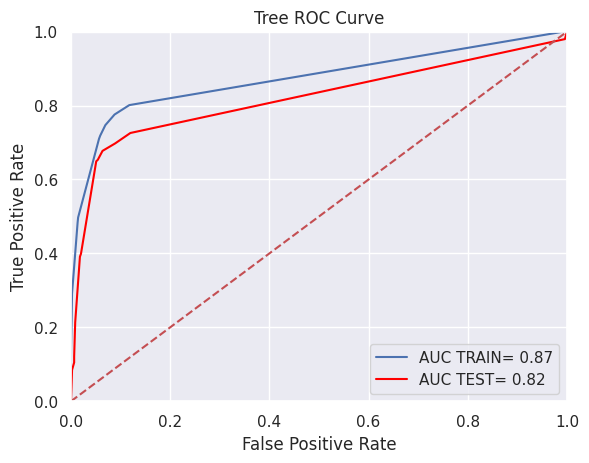

In [5]:
#Decision Tree for Predicting Probability of Loan Default

#Probability of Default
fm01_Tree = tree.DecisionTreeClassifier(max_depth=5)
fm01_Tree = fm01_Tree.fit(X_train, Y_train[TARGET_F])

y_Pred_Train = fm01_Tree.predict(X_train)
y_Pred_Test = fm01_Tree.predict(X_test)

print("Decision Tree for Predicting Probability of Loan Default\n")
print("Probability of Default\n")
print("Training Data Set Accuracy:", metrics.accuracy_score(Y_train[TARGET_F], y_Pred_Train))
print("Test Data Set Accuracy:", metrics.accuracy_score(Y_test[TARGET_F], y_Pred_Test))
print("\n=================================\n")

#ROC Curves
probs = fm01_Tree.predict_proba(X_train)
p1 = probs[:,1]
fpr_train, tpr_train, threshold = metrics.roc_curve(Y_train[TARGET_F], p1)
roc_auc_train = metrics.auc(fpr_train, tpr_train)

probs = fm01_Tree.predict_proba(X_test)
p1 = probs[:,1]
fpr_test, tpr_test, threshold = metrics.roc_curve(Y_test[TARGET_F], p1)
roc_auc_test = metrics.auc(fpr_test, tpr_test)

fpr_tree = fpr_test
tpr_tree = tpr_test
auc_tree = roc_auc_test

plt.title('Tree ROC Curve')
plt.plot(fpr_train, tpr_train, 'b', label = 'AUC TRAIN= %0.2f' % roc_auc_train)
plt.plot(fpr_test, tpr_test, label = 'AUC TEST= %0.2f' % roc_auc_test, color = "red")
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()



Decision Tree For Predicting Probability of Defaulting



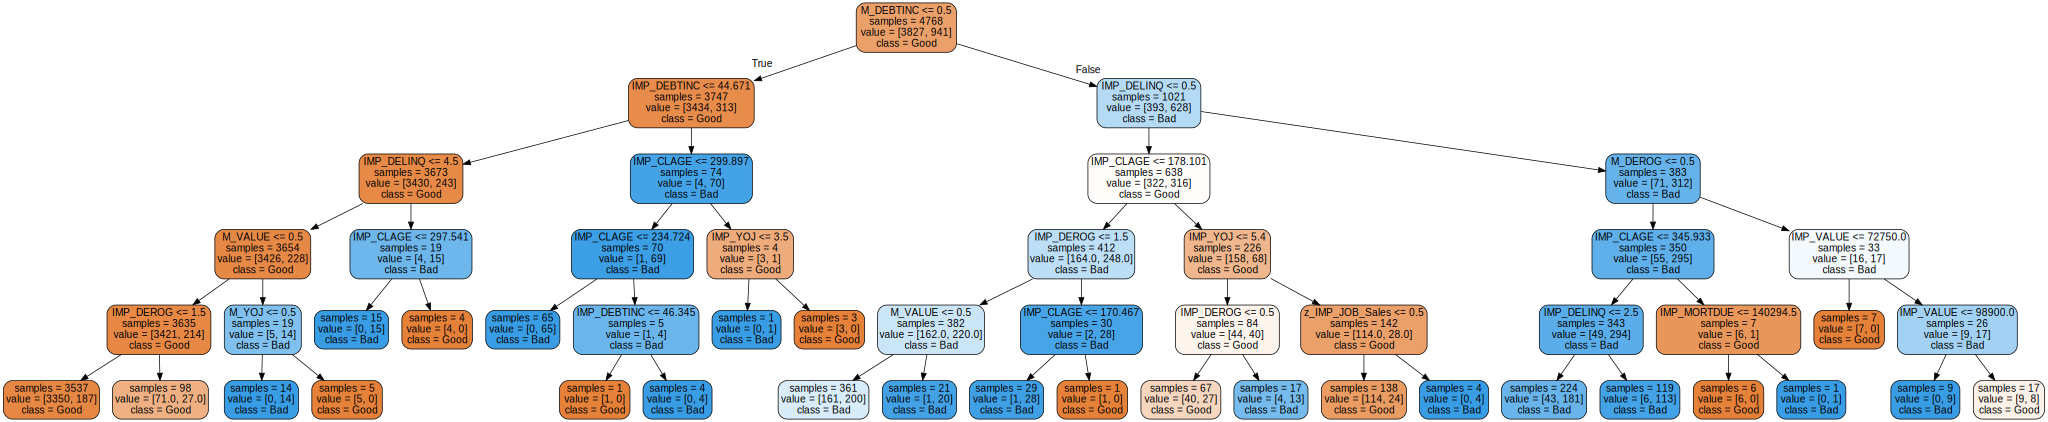

In [6]:
#Decision Tree Visualization w/ Graph Viz
from graphviz import Source
import os
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "decision_trees"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

print("Decision Tree For Predicting Probability of Defaulting\n")
feature_cols = list(X.columns.values)
tree.export_graphviz(fm01_Tree, out_file=os.path.join(IMAGES_PATH, "tree_f.dot"), filled=True, rounded=True,
                     feature_names=feature_cols, impurity=False, class_names=["Good","Bad"])
Source.from_file(os.path.join(IMAGES_PATH, "tree_f.dot"))


In [7]:
#Variables included in the decision tree that predict loan default
def getTreeVars( TREE, varNames ) :
  tree_ = TREE.tree_
  varName = [ varNames[i] if i != _tree.TREE_UNDEFINED else "undefined!" for i in tree_.feature ]

  nameSet = set()
  for i in tree_.feature :
    if i != _tree.TREE_UNDEFINED :
      nameSet.add( i )
  nameList = list( nameSet )
  parameter_list = list()
  for i in nameList :
    parameter_list.append( varNames[i] )
  return parameter_list

print("Variables included in Decision Tree that contribute to Loan Defaulting Probability\n")
vars_tree_flag = getTreeVars(fm01_Tree, feature_cols)
for i in vars_tree_flag:
  print(i)

Variables included in Decision Tree that contribute to Loan Defaulting Probability

z_IMP_JOB_Sales
IMP_MORTDUE
M_VALUE
IMP_VALUE
M_YOJ
IMP_YOJ
M_DEROG
IMP_DEROG
IMP_DELINQ
IMP_CLAGE
M_DEBTINC
IMP_DEBTINC


RMSE (Mean Squared Error)

TREE RMSE TRAIN =  4561.00912099753
TREE RMSE TEST =  5732.6842719501765



Variables included in Decision Tree that contribute to Loan Loss Amount

LOAN
z_IMP_REASON_DebtCon
IMP_MORTDUE
IMP_NINQ
IMP_CLNO
M_DEBTINC
IMP_DEBTINC



Decision Tree for Predicting the Loss Amount (Assuming Loan Defaults)



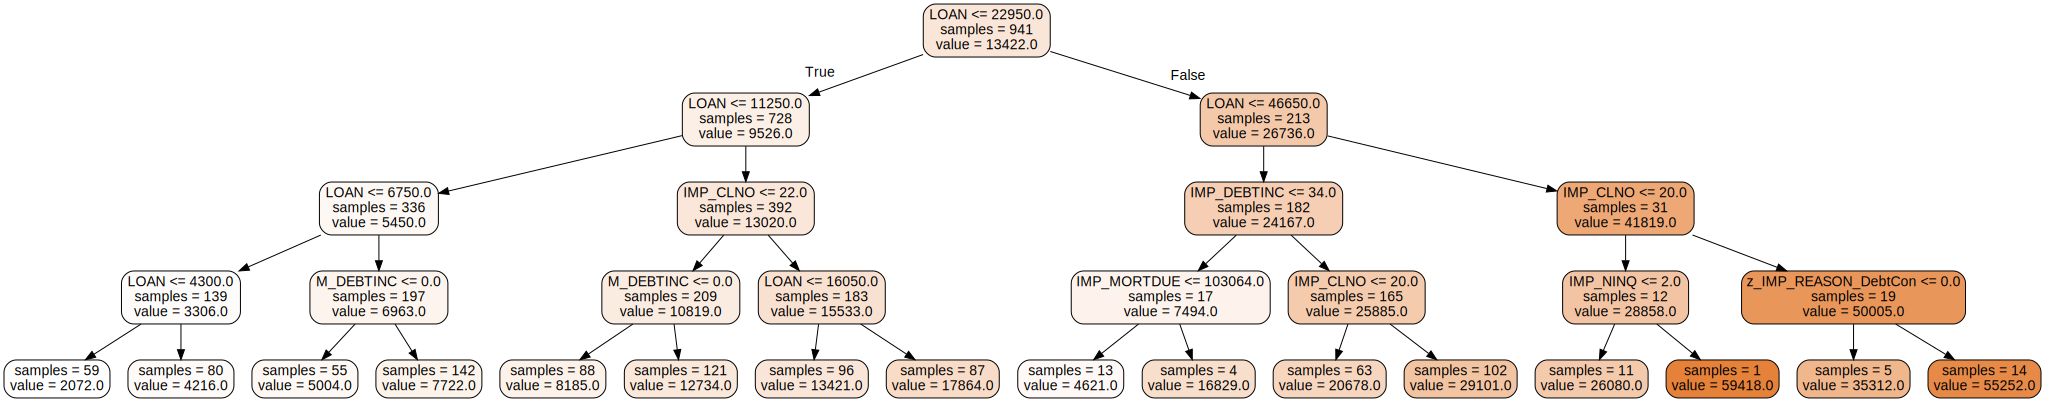

In [8]:
#Decision Tree for Loan Default Loss Amount
F = ~ Y_train[TARGET_A].isna()
W_Train = X_train[F]
Z_Train = Y_train[F]

F = ~ Y_test[TARGET_A].isna()
W_Test = X_test[F]
Z_Test = Y_test[F]

#Predict the loss amount assuming that the loan defaults
amt_m01_Tree = tree.DecisionTreeRegressor(max_depth=4)
amt_m01_Tree = amt_m01_Tree.fit(W_Train, Z_Train[TARGET_A])

Z_Pred_Train = amt_m01_Tree.predict(W_Train)
Z_Pred_Test = amt_m01_Tree.predict(W_Test)

#Calculate RMSE (Mean Squared Error)
RMSE_TRAIN = math.sqrt(metrics.mean_squared_error(Z_Train[TARGET_A], Z_Pred_Train))
RMSE_TEST = math.sqrt(metrics.mean_squared_error(Z_Test[TARGET_A], Z_Pred_Test))
print("RMSE (Mean Squared Error)\n")
print("TREE RMSE TRAIN = ", RMSE_TRAIN)
print("TREE RMSE TEST = ", RMSE_TEST)
print("\n=================================\n")
RMSE_TREE = RMSE_TEST
feature_cols = list(X.columns.values)
vars_tree_amt = getTreeVars(amt_m01_Tree, feature_cols)
print("\nVariables included in Decision Tree that contribute to Loan Loss Amount\n")
for i in vars_tree_amt:
  print(i)

print("\n=================================\n")
print("\nDecision Tree for Predicting the Loss Amount (Assuming Loan Defaults)\n")

tree.export_graphviz(amt_m01_Tree, out_file=os.path.join(IMAGES_PATH, "tree_a.dot"), filled=True, rounded=True,
                     feature_names=feature_cols, impurity=False, precision=0)
Source.from_file(os.path.join(IMAGES_PATH, "tree_a.dot"))

Probability of Default

Training Data Set Accuracy: 0.9997902684563759
Test Data Set Accuracy: 0.9161073825503355


Variables included in Random Forest Model that contribute to Loan Defaulting Probability

('M_DEBTINC', 100)
('IMP_DEBTINC', 74)
('IMP_CLAGE', 44)
('IMP_DELINQ', 42)
('LOAN', 41)
('IMP_VALUE', 40)
('IMP_CLNO', 35)
('IMP_MORTDUE', 35)
('IMP_YOJ', 29)
('IMP_DEROG', 25)
('IMP_NINQ', 20)




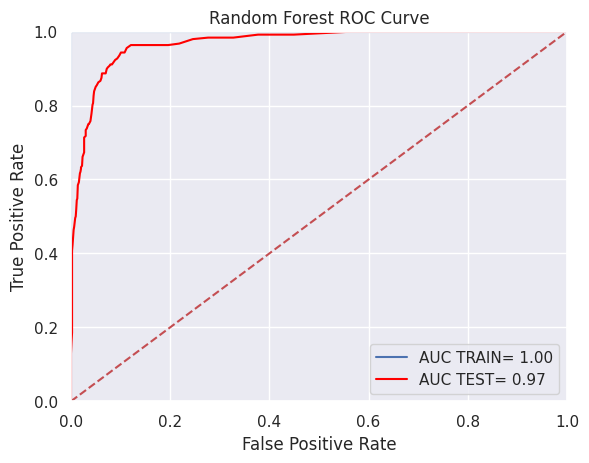

In [9]:
#Random Forests for Predicting Probability of Loan Default
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from operator import itemgetter

fm01_RF = RandomForestClassifier(n_estimators=100, random_state=1)
fm01_RF = fm01_RF.fit(X_train, Y_train[TARGET_F])
Y_Pred_train = fm01_RF.predict(X_train)
Y_Pred_test = fm01_RF.predict(X_test)

print("Probability of Default\n")
print("Training Data Set Accuracy:", metrics.accuracy_score(Y_train[TARGET_F], Y_Pred_train))
print("Test Data Set Accuracy:", metrics.accuracy_score(Y_test[TARGET_F], Y_Pred_test))
print("\n=================================\n")
#ROC Curves
probs = fm01_RF.predict_proba(X_train)
p1 = probs[:,1]
fpr_train, tpr_train, threshold = metrics.roc_curve(Y_train[TARGET_F], p1)
roc_auc_train = metrics.auc(fpr_train, tpr_train)

probs = fm01_RF.predict_proba(X_test)
p1 = probs[:,1]
fpr_test, tpr_test, threshold = metrics.roc_curve(Y_test[TARGET_F], p1)
roc_auc_test = metrics.auc(fpr_test, tpr_test)

fpr_RF = fpr_test
tpr_RF = tpr_test
auc_RF = roc_auc_test

#Variables contributing to Loan Defaulting
print("Variables included in Random Forest Model that contribute to Loan Defaulting Probability\n")

def getEnsembleTreeVars( ENSTREE, varNames ) :
  importance = ENSTREE.feature_importances_
  index = np.argsort(importance)
  theList = []
  for i in index :
    imp_val = importance[i]
    if imp_val > np.average( ENSTREE.feature_importances_ ) :
      v = int( imp_val / np.max( ENSTREE.feature_importances_ ) * 100 )
      theList.append( ( varNames[i], v ) )
  theList = sorted(theList,key=itemgetter(1),reverse=True)
  return theList

feature_cols = list(X.columns.values)
vars_RF_flag = getEnsembleTreeVars(fm01_RF, feature_cols)
for i in vars_RF_flag:
  print(i)

print("\n=================================\n")
plt.title('Random Forest ROC Curve')
plt.plot(fpr_train, tpr_train, 'b', label = 'AUC TRAIN= %0.2f' % roc_auc_train)
plt.plot(fpr_test, tpr_test, label = 'AUC TEST= %0.2f' % roc_auc_test, color = "red")
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


In [10]:
#Random Forest for Loan Default Loss Amount
amt_m01_RF = RandomForestRegressor(n_estimators=100, random_state=1)
amt_m01_RF.fit(W_Train, Z_Train[TARGET_A])

Z_Pred_Train = amt_m01_RF.predict(W_Train)
Z_Pred_Test = amt_m01_RF.predict(W_Test)

#Calculate RMSE (Mean Squared Error)
RMSE_TRAIN = math.sqrt(metrics.mean_squared_error(Z_Train[TARGET_A], Z_Pred_Train))
RMSE_TEST = math.sqrt(metrics.mean_squared_error(Z_Test[TARGET_A], Z_Pred_Test))
print("RMSE (Mean Squared Error)\n")
print("Random Forest RMSE TRAIN = ", RMSE_TRAIN)
print("Random Forest RMSE TEST = ", RMSE_TEST)
print("\n=================================\n")

#Variables Predicting Loss Amount
RMSE_RF = RMSE_TEST
feature_cols = list(X.columns.values)
vars_RF_amt = getEnsembleTreeVars(amt_m01_RF, feature_cols)
print("\nVariables included in Random Forest model that contribute to Loan Loss Amount\n")
for i in vars_RF_amt:
  print(i)


RMSE (Mean Squared Error)

Random Forest RMSE TRAIN =  1238.42831958866
Random Forest RMSE TEST =  3272.2093665087723



Variables included in Random Forest model that contribute to Loan Loss Amount

('LOAN', 100)
('IMP_CLNO', 12)
('IMP_DEBTINC', 5)


Probability of Default

Training Data Set Accuracy: 0.9234479865771812
Test Data Set Accuracy: 0.9043624161073825


Variables included in Gradient Boosting model that contribute to Loan Defaulting Probability

('M_DEBTINC', 100)
('IMP_DEBTINC', 29)
('IMP_DELINQ', 19)
('IMP_CLAGE', 14)
('IMP_DEROG', 7)




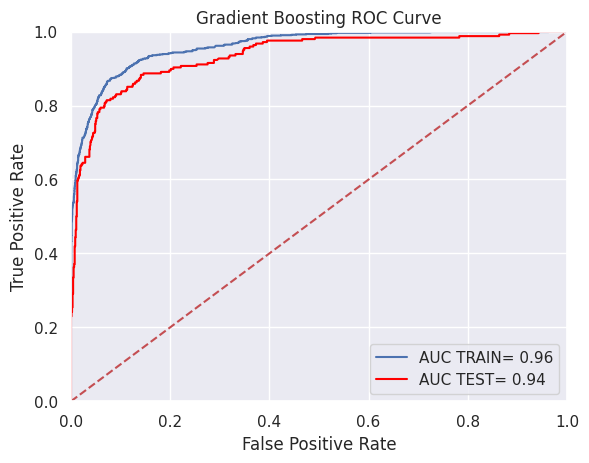

In [11]:
#Gradient Boosting for Predicting Probability of Loan Default
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingRegressor

fm01_GB = GradientBoostingClassifier(random_state=1)
fm01_GB =fm01_GB.fit(X_train, Y_train[TARGET_F])

Y_Pred_train = fm01_GB.predict(X_train)
Y_Pred_test = fm01_GB.predict(X_test)

print("Probability of Default\n")
print("Training Data Set Accuracy:", metrics.accuracy_score(Y_train[TARGET_F], Y_Pred_train))
print("Test Data Set Accuracy:", metrics.accuracy_score(Y_test[TARGET_F], Y_Pred_test))
print("\n=================================\n")

#ROC Curves
probs = fm01_GB.predict_proba(X_train)
p1 = probs[:,1]
fpr_train, tpr_train, threshold = metrics.roc_curve(Y_train[TARGET_F], p1)
roc_auc_train = metrics.auc(fpr_train, tpr_train)

probs = fm01_GB.predict_proba(X_test)
p1 = probs[:,1]
fpr_test, tpr_test, threshold = metrics.roc_curve(Y_test[TARGET_F], p1)
roc_auc_test = metrics.auc(fpr_test, tpr_test)

fpr_GB = fpr_test
tpr_GB = tpr_test
auc_GB = roc_auc_test

feature_cols = list(X.columns.values)
vars_GB_amt = getEnsembleTreeVars(fm01_GB, feature_cols)
print("Variables included in Gradient Boosting model that contribute to Loan Defaulting Probability\n")
for i in vars_GB_amt:
  print(i)

print("\n=================================\n")


plt.title('Gradient Boosting ROC Curve')
plt.plot(fpr_train, tpr_train, 'b', label = 'AUC TRAIN= %0.2f' % roc_auc_train)
plt.plot(fpr_test, tpr_test, label = 'AUC TEST= %0.2f' % roc_auc_test, color = "red")
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


In [13]:
#Gradient Boosting for Loan Default Loss Amount
amt_m01_GB = GradientBoostingRegressor(random_state=1)
amt_m01_GB = amt_m01_GB.fit(W_Train, Z_Train[TARGET_A])
Z_Pred_train = amt_m01_GB.predict(W_Train)
Z_Pred_test = amt_m01_GB.predict(W_Test)

#RMSE
RMSE_TRAIN = math.sqrt(metrics.mean_squared_error(Z_Train[TARGET_A], Z_Pred_train))
RMSE_TEST = math.sqrt(metrics.mean_squared_error(Z_Test[TARGET_A], Z_Pred_test))

print("RMSE (Mean Squared Error)\n")
print('RMSE_TRAIN: ', RMSE_TRAIN)
print('RMSE_TEST: ', RMSE_TEST)
print("\n=================================\n")

#Variables predicting loss amount
RMSE_GB = RMSE_TEST
feature_cols = list(X.columns.values)
vars_RF_amt = getEnsembleTreeVars(amt_m01_GB, feature_cols)
print("Variables included in Random Forest model that contribute to Loan Loss Amount\n")
for i in vars_RF_amt:
  print(i)


RMSE (Mean Squared Error)

RMSE_TRAIN:  1190.372223849314
RMSE_TEST:  2641.734547206168


Variables included in Random Forest model that contribute to Loan Loss Amount

('LOAN', 100)
('IMP_CLNO', 14)
('IMP_DEBTINC', 5)
('M_DEBTINC', 5)


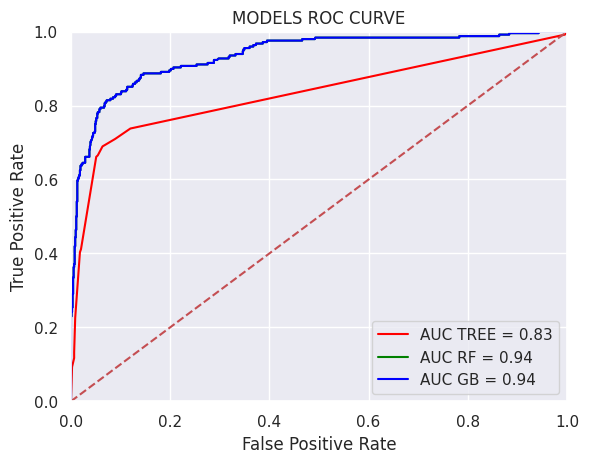



Root Mean Square Average For Damages
TREE 5732.6842719501765
RF 3272.2093665087723
GB 2641.734547206168


In [85]:
#ROC curve for the Decision Tree, Random Forest, and Gradient Boosting models using the Test Data Set
plt.title('MODELS ROC CURVE')
plt.plot(fpr_tree, tpr_tree, label = 'AUC TREE = %0.2f' % auc_tree, color="red")
plt.plot(fpr_RF, tpr_RF, label = 'AUC RF = %0.2f' % auc_RF, color="green")
plt.plot(fpr_GB, tpr_GB, label = 'AUC GB = %0.2f' % auc_GB, color="blue")
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

print("\n=================================\n")

print("Root Mean Square Average For Damages")
print("TREE", RMSE_TREE)
print("RF", RMSE_RF)
print("GB", RMSE_GB)


# **Assignment 2 Analysis**

**1)** After looking at the generated decision trees for loan default probability and the loan default amount, I think they identified the right columns that corresponded with what I had predicted the model would output. They identified key variables like debt-to-income ratio, loan amount, and delinquency history to be important factors in predicting loan defaults.

**2)** The most predictive variables were DEBTINC, DELINQ, CLAGE, LOAN, and MORTDUE. I believe these variables do a good job of predicting likelihood of defaulting on a loan. For example, having a higher debt-to-income ratio, larger loan amounts, a shorter credit history can all point to higher chances of being unable to pay the rent due to consumer behavior.

**3)** Like the variables predicting the probability of defaulting on a home equity loan, there were some overlapping variables that were predictive of the loan amount. For example, MORTDUE, LOAN, and DEBTINC were all predictive factors. When you have borrowers who have a high debt-to-income ratio, high loan amounts, and a high amount due on the existing mortgage, that often leads them to defaulting and subsequently to higher debt.

**4)** Based on the ROC curves for all three models and overall performance, I would recommend Gradient Boosting model for production because of its higher accuracy (AUC) in the ROC curves and robustness, since it's a lot less susceptible to oerfitting versus the other two models. This allows for a more stable model that can predict more accurately, even with outliers.